In [2]:
import numpy as np
import matplotlib.pyplot as plt

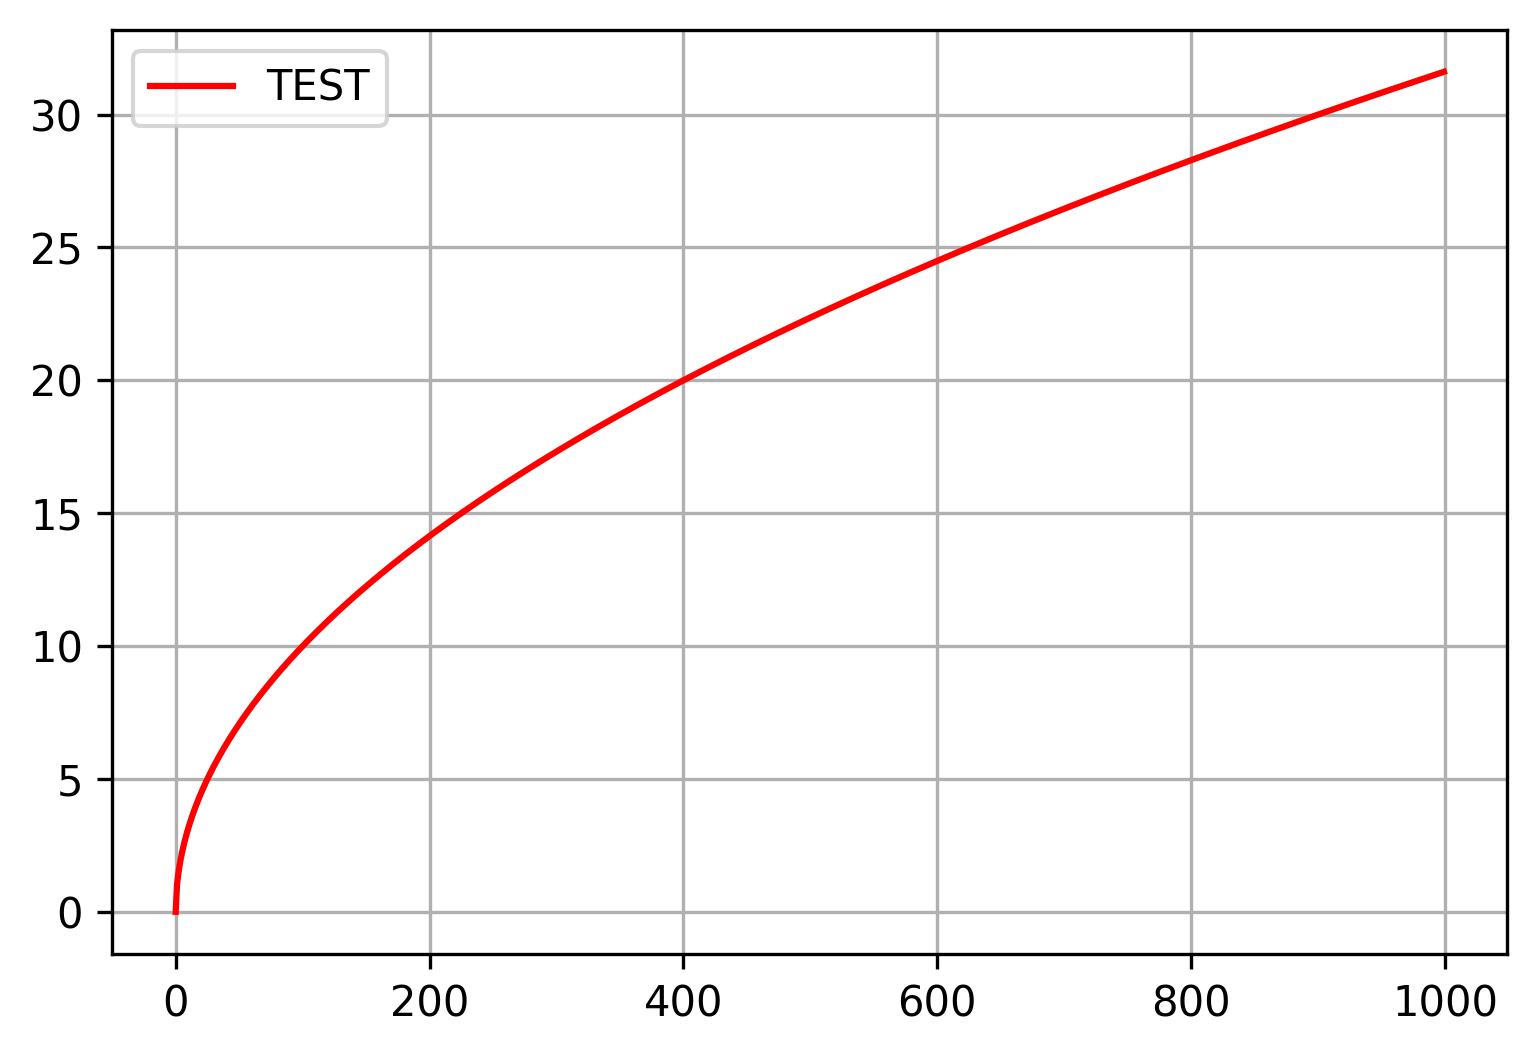

In [2]:
X = np.arange(0, 1000, 1)
Y = np.sqrt(X)

plt.figure(figsize=(6,4), dpi=300)
plt.plot(X, Y, 'r-', label="TEST")
plt.grid('minor')
plt.legend()


In [4]:
def plotasy(fig, axs, data, N, Nprew, i, j):

    color1 = "#ee4035"
    color3 = "#f37736"
    color4 = "#7bc043"
    color2 = "#0392cf"
    x=data[Nprew + 3*N:Nprew + 4*N,0]
    y=data[Nprew + 3*N:Nprew + 4*N,1]
    bound = np.max(np.abs([x.min(), x.max(), y.min(), y.max()]))
    axs[i, j].plot(data[Nprew + 3*N:Nprew + 4*N,0], data[Nprew + 3*N:Nprew + 4*N,1], 'o', markeredgecolor=color1, markerfacecolor=color1, markersize=1.8, alpha=0.8, label="t = 100.0")
    axs[i, j].plot(data[Nprew + 2*N:Nprew + 3*N,0], data[Nprew + 2*N:Nprew + 3*N,1], 'o', markeredgecolor=color2, markerfacecolor=color2, markersize=1.8, alpha=0.8, label="t = 10.0")
    axs[i, j].plot(data[Nprew + N:Nprew + 2*N,0], data[Nprew + N:Nprew + 2*N,1], 'o', markeredgecolor=color3, markerfacecolor=color3, markersize=1.8, alpha=0.8, label="t = 1.0")
    axs[i, j].plot(data[Nprew + 0:Nprew + N,0], data[Nprew + 0:Nprew + N,1], 'o', markeredgecolor=color4, markerfacecolor=color4, markersize=1.8, alpha=0.8, label="t = 0.1")
    axs[i, j].grid(True)
    axs[i,j].set_ylim(-bound, bound)
    axs[i,j].set_xlim(-bound, bound)
    axs[i, j].set_title(str(N) + " cząsteczek", fontsize=20)
    axs[i, j].set_xlabel("Współrzędna X", fontsize=16)
    axs[i, j].set_ylabel("Współrzędna Y", fontsize=16)
    axs[i, j].legend(markerscale=3, fontsize=12, loc='upper left')

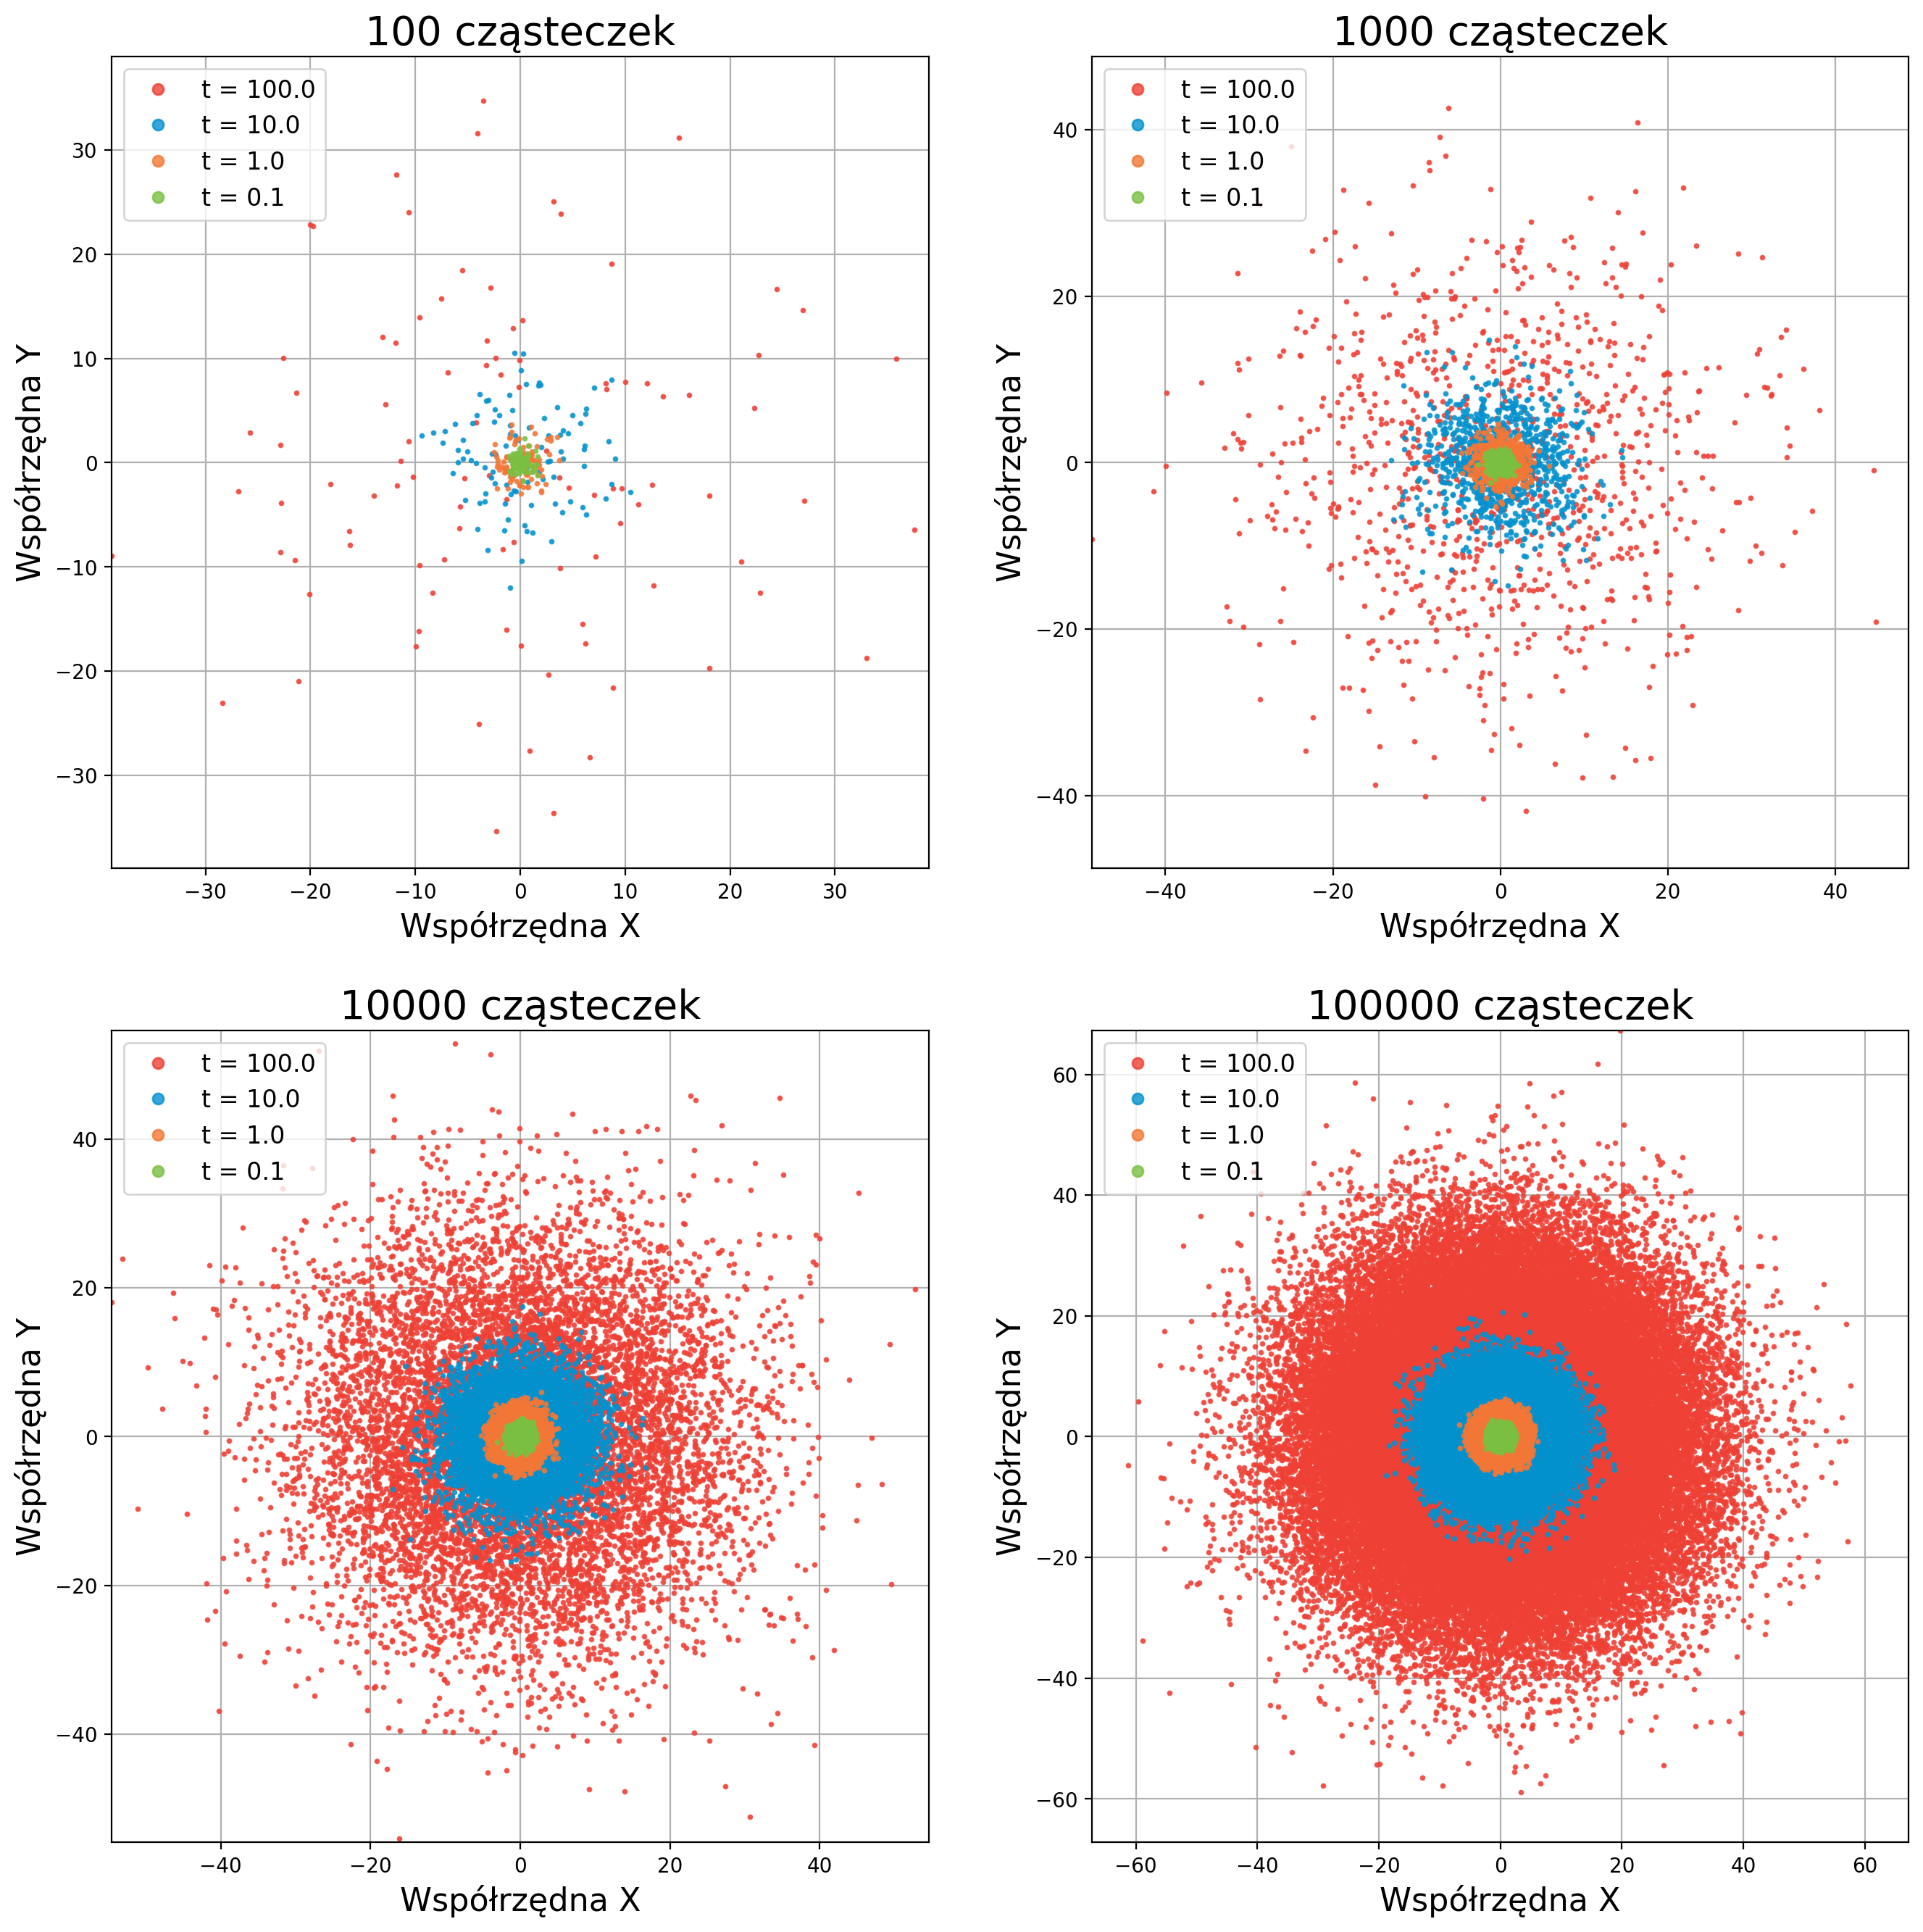

In [5]:
positions = np.loadtxt("wiener_pos.dat", comments="#", delimiter=" ", unpack=False)

Ns = np.array([0, 10**2, 10**3, 10**4, 10**5]) #
Nprew = 0
N = 0
fig, axs = plt.subplots(2, 2, figsize=(16,16), dpi=200)
for i in range(2):
    for j in range(2):
        Nprew += Ns[N]*4
        plotasy(fig, axs, positions, Ns[N+1], Nprew, i, j)
        N+=1
plt.show()

In [15]:
def plotasy_stat(fig, axs, data, N, i, Ns, ax1, ax2):
    x = data[0+N*i:N+N*i,1]


    d1 = data[0+N*i:N+N*i,5]
    mean_d1 = np.sum(d1)/N
    sdt_d1 = np.sqrt((np.sum(d1**2)/N - mean_d1**2)/N)
    
    d2 = data[0+N*i:N+N*i,6]
    mean_d2 = np.sum(d2)/N
    sdt_d2 = np.sqrt((np.sum(d2**2)/N - mean_d2**2)/N)
    
    d3 = data[0+N*i:N+N*i,7]
    mean_d3 = np.sum(d3)/N
    sdt_d3 = np.sqrt((np.sum(d3**2)/N - mean_d3**2)/N)

    print(f"{mean_d1:.4e}")
    print(f"{sdt_d1:.4e}")
    print(f"{mean_d2:.4e}")
    print(f"{sdt_d2:.4e}")
    print(f"{mean_d3:.4e}")
    print(f"{sdt_d3:.4e}")

    axs[ax1, ax2].plot(x, d1, '-', linewidth=2.5, color='tab:orange', label=r"D$_{\text{XX}}$")
    axs[ax1, ax2].fill_between(x, d1-sdt_d1, d1+sdt_d1, alpha=0.5, facecolor='tab:orange')

    axs[ax1, ax2].plot(x, d2, '-', linewidth=2.5, color='tab:blue' , label=r"D$_{\text{YY}}$")
    axs[ax1, ax2].fill_between(x, d2-sdt_d1, d2+sdt_d2, alpha=0.5, facecolor='tab:blue')

    axs[ax1, ax2].plot(x, d3, '-', linewidth=2.5, color='tab:green' , label=r"D$_{\text{XY}}$")
    axs[ax1, ax2].fill_between(x, d3-sdt_d3, d3+sdt_d3, alpha=0.5, facecolor='tab:green')

    axs[ax1, ax2].grid(True)
    axs[ax1, ax2].set_title(str(Ns) + " cząsteczek", fontsize=20)
    axs[ax1, ax2].set_xlabel("Czas [s]", fontsize=20)
    axs[ax1, ax2].set_ylabel(r'Wartość wspł. dyfuzji [$m^2\cdot s^{-1}$]', fontsize=20)
    axs[ax1, ax2].legend(markerscale=12, fontsize=12, loc='center right')
    axs[ax1, ax2].set_xlim([0,100])

1.1575e+00
2.9336e-03
1.0243e+00
2.0644e-03
1.9515e-03
2.0517e-03
1.0007e+00
1.3069e-03
1.0163e+00
1.1975e-03
-1.3111e-02
7.5340e-04
9.9941e-01
3.1472e-04
1.0079e+00
4.0698e-04
-1.3187e-03
2.6532e-04
1.0002e+00
9.7710e-05
1.0050e+00
9.2684e-05
-2.9196e-03
8.3302e-05


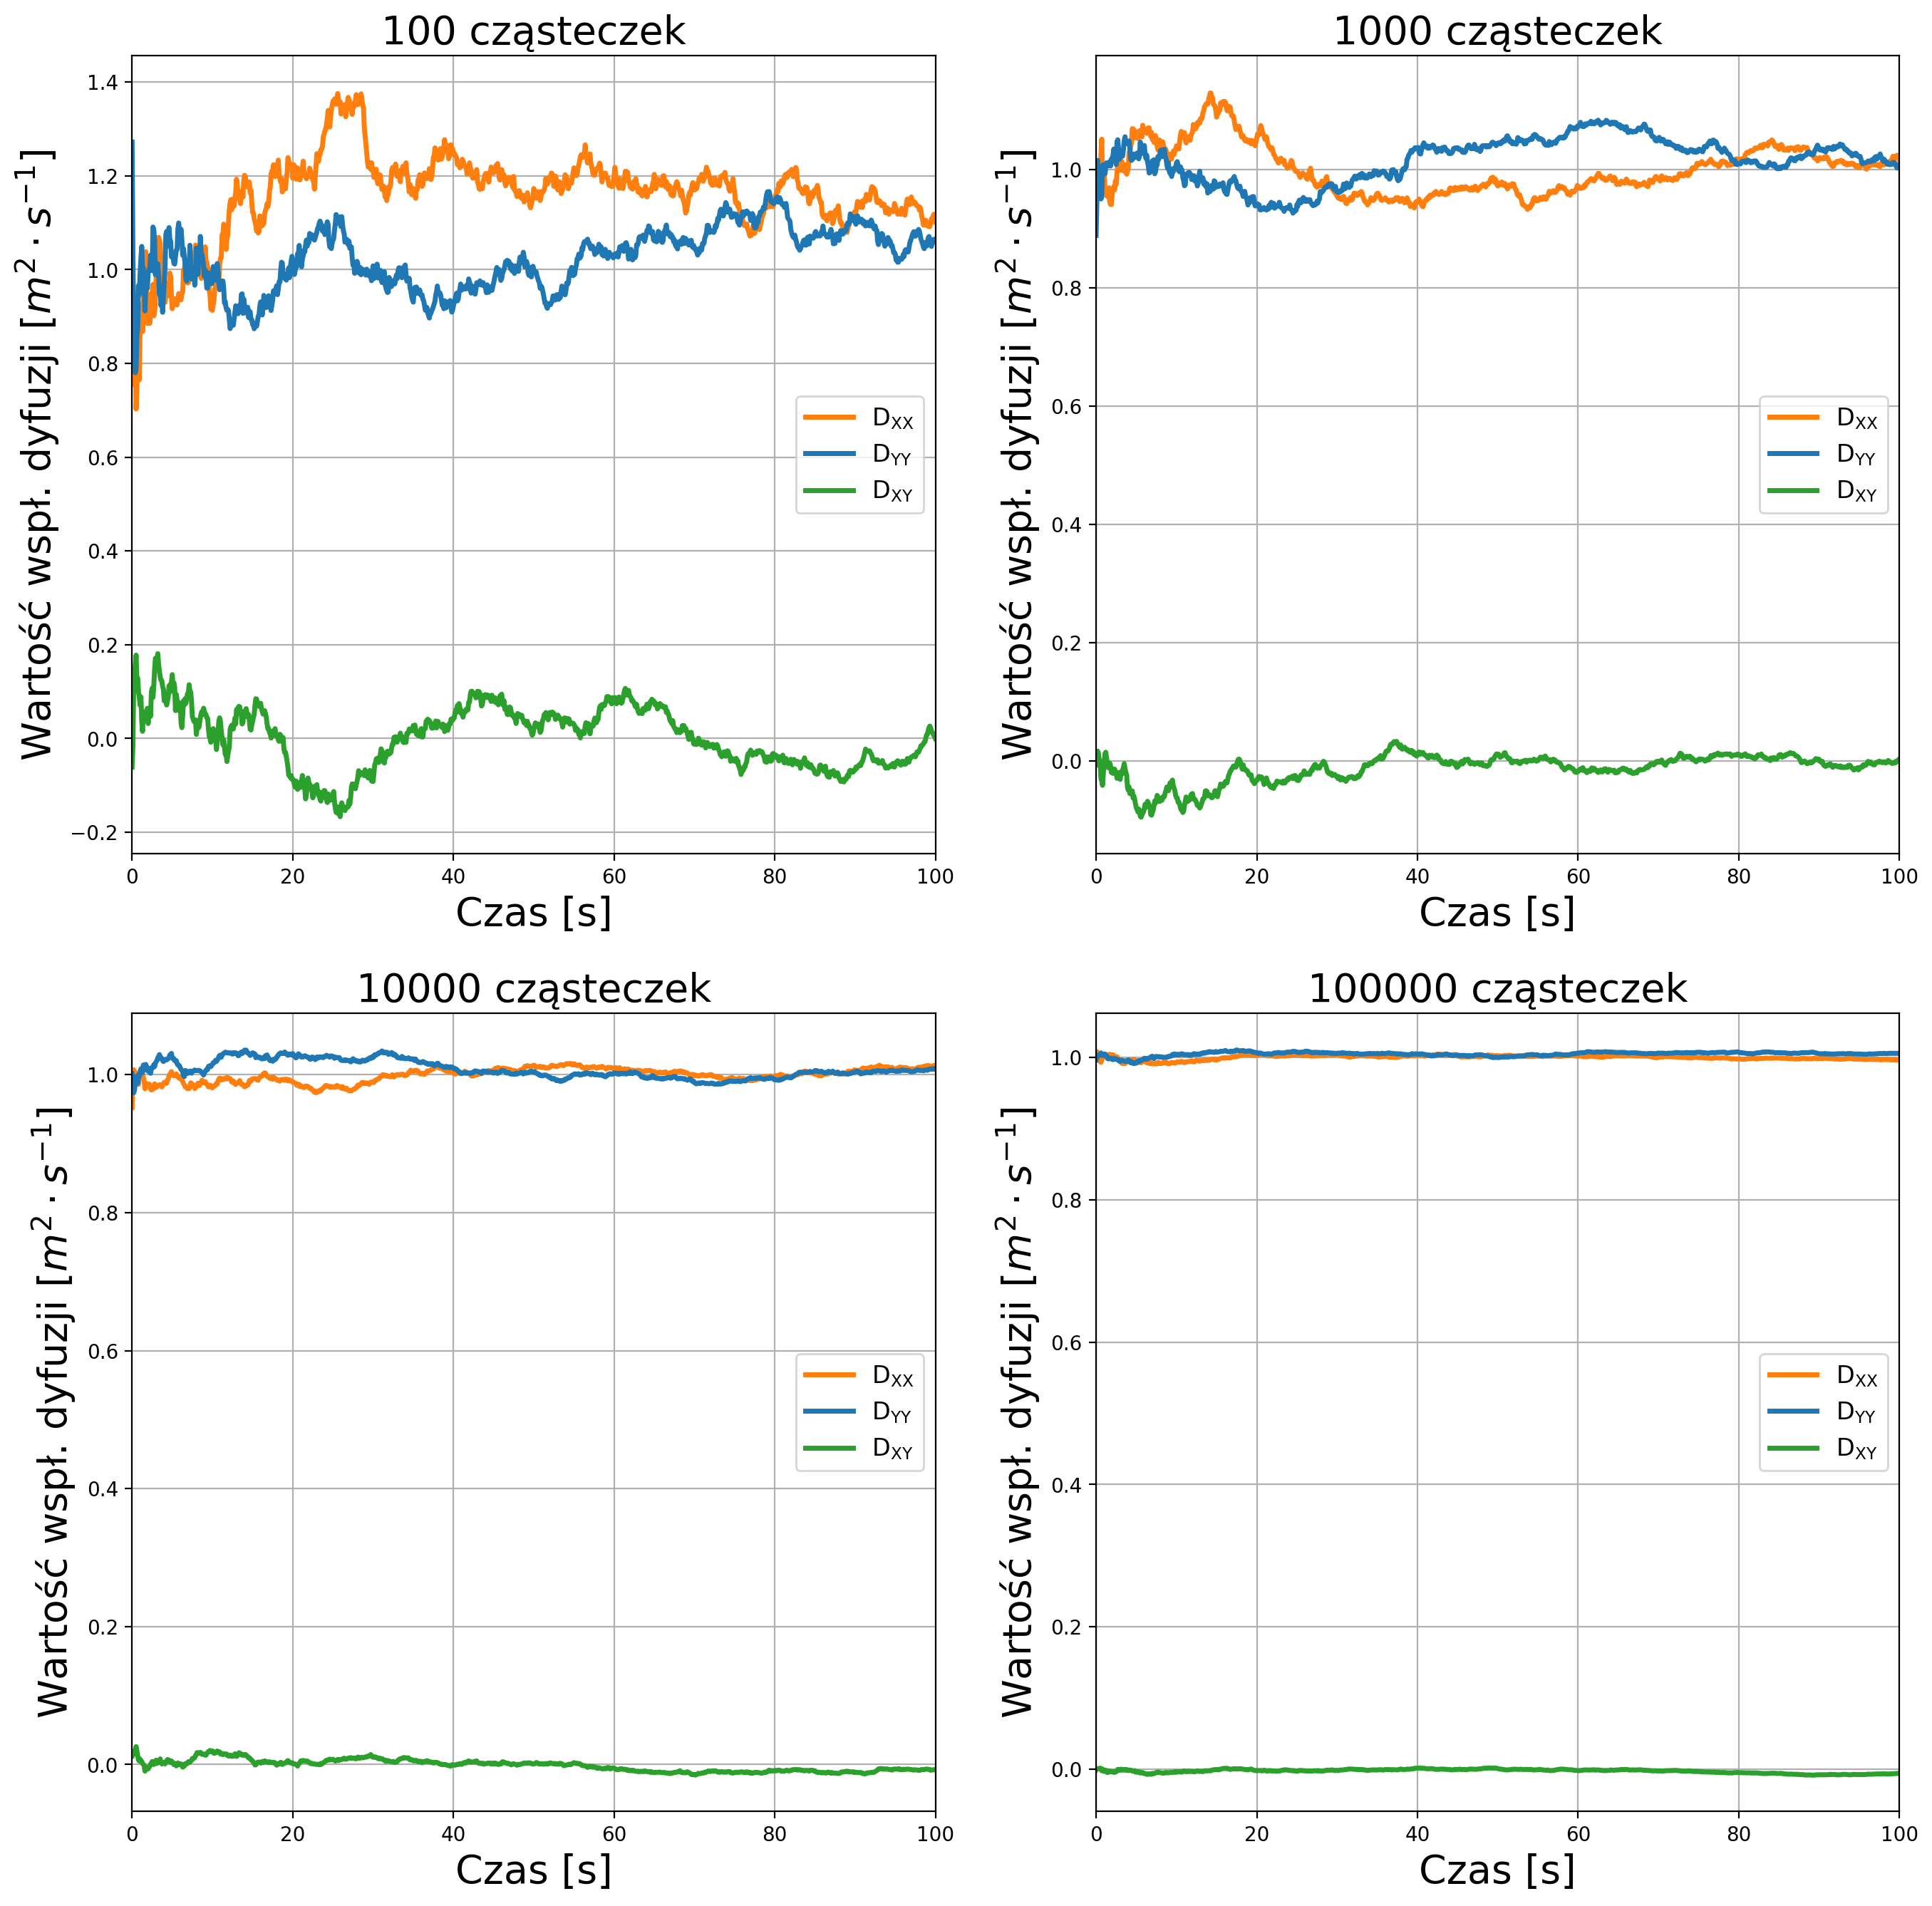

In [16]:
stat = np.loadtxt("wiener_stat.dat", comments="#", delimiter=" ", unpack=False, skiprows=1)
# print(stat)

Ns = np.array([10**2, 10**3, 10**4, 10**5]) #
fig, axs = plt.subplots(2, 2, figsize=(16,16), dpi=200)

i=0
for ax1 in range(2):
    for ax2 in range(2):
        plotasy_stat(fig, axs, stat, 1001, i, Ns[i], ax1, ax2)
        i+=1
plt.show()

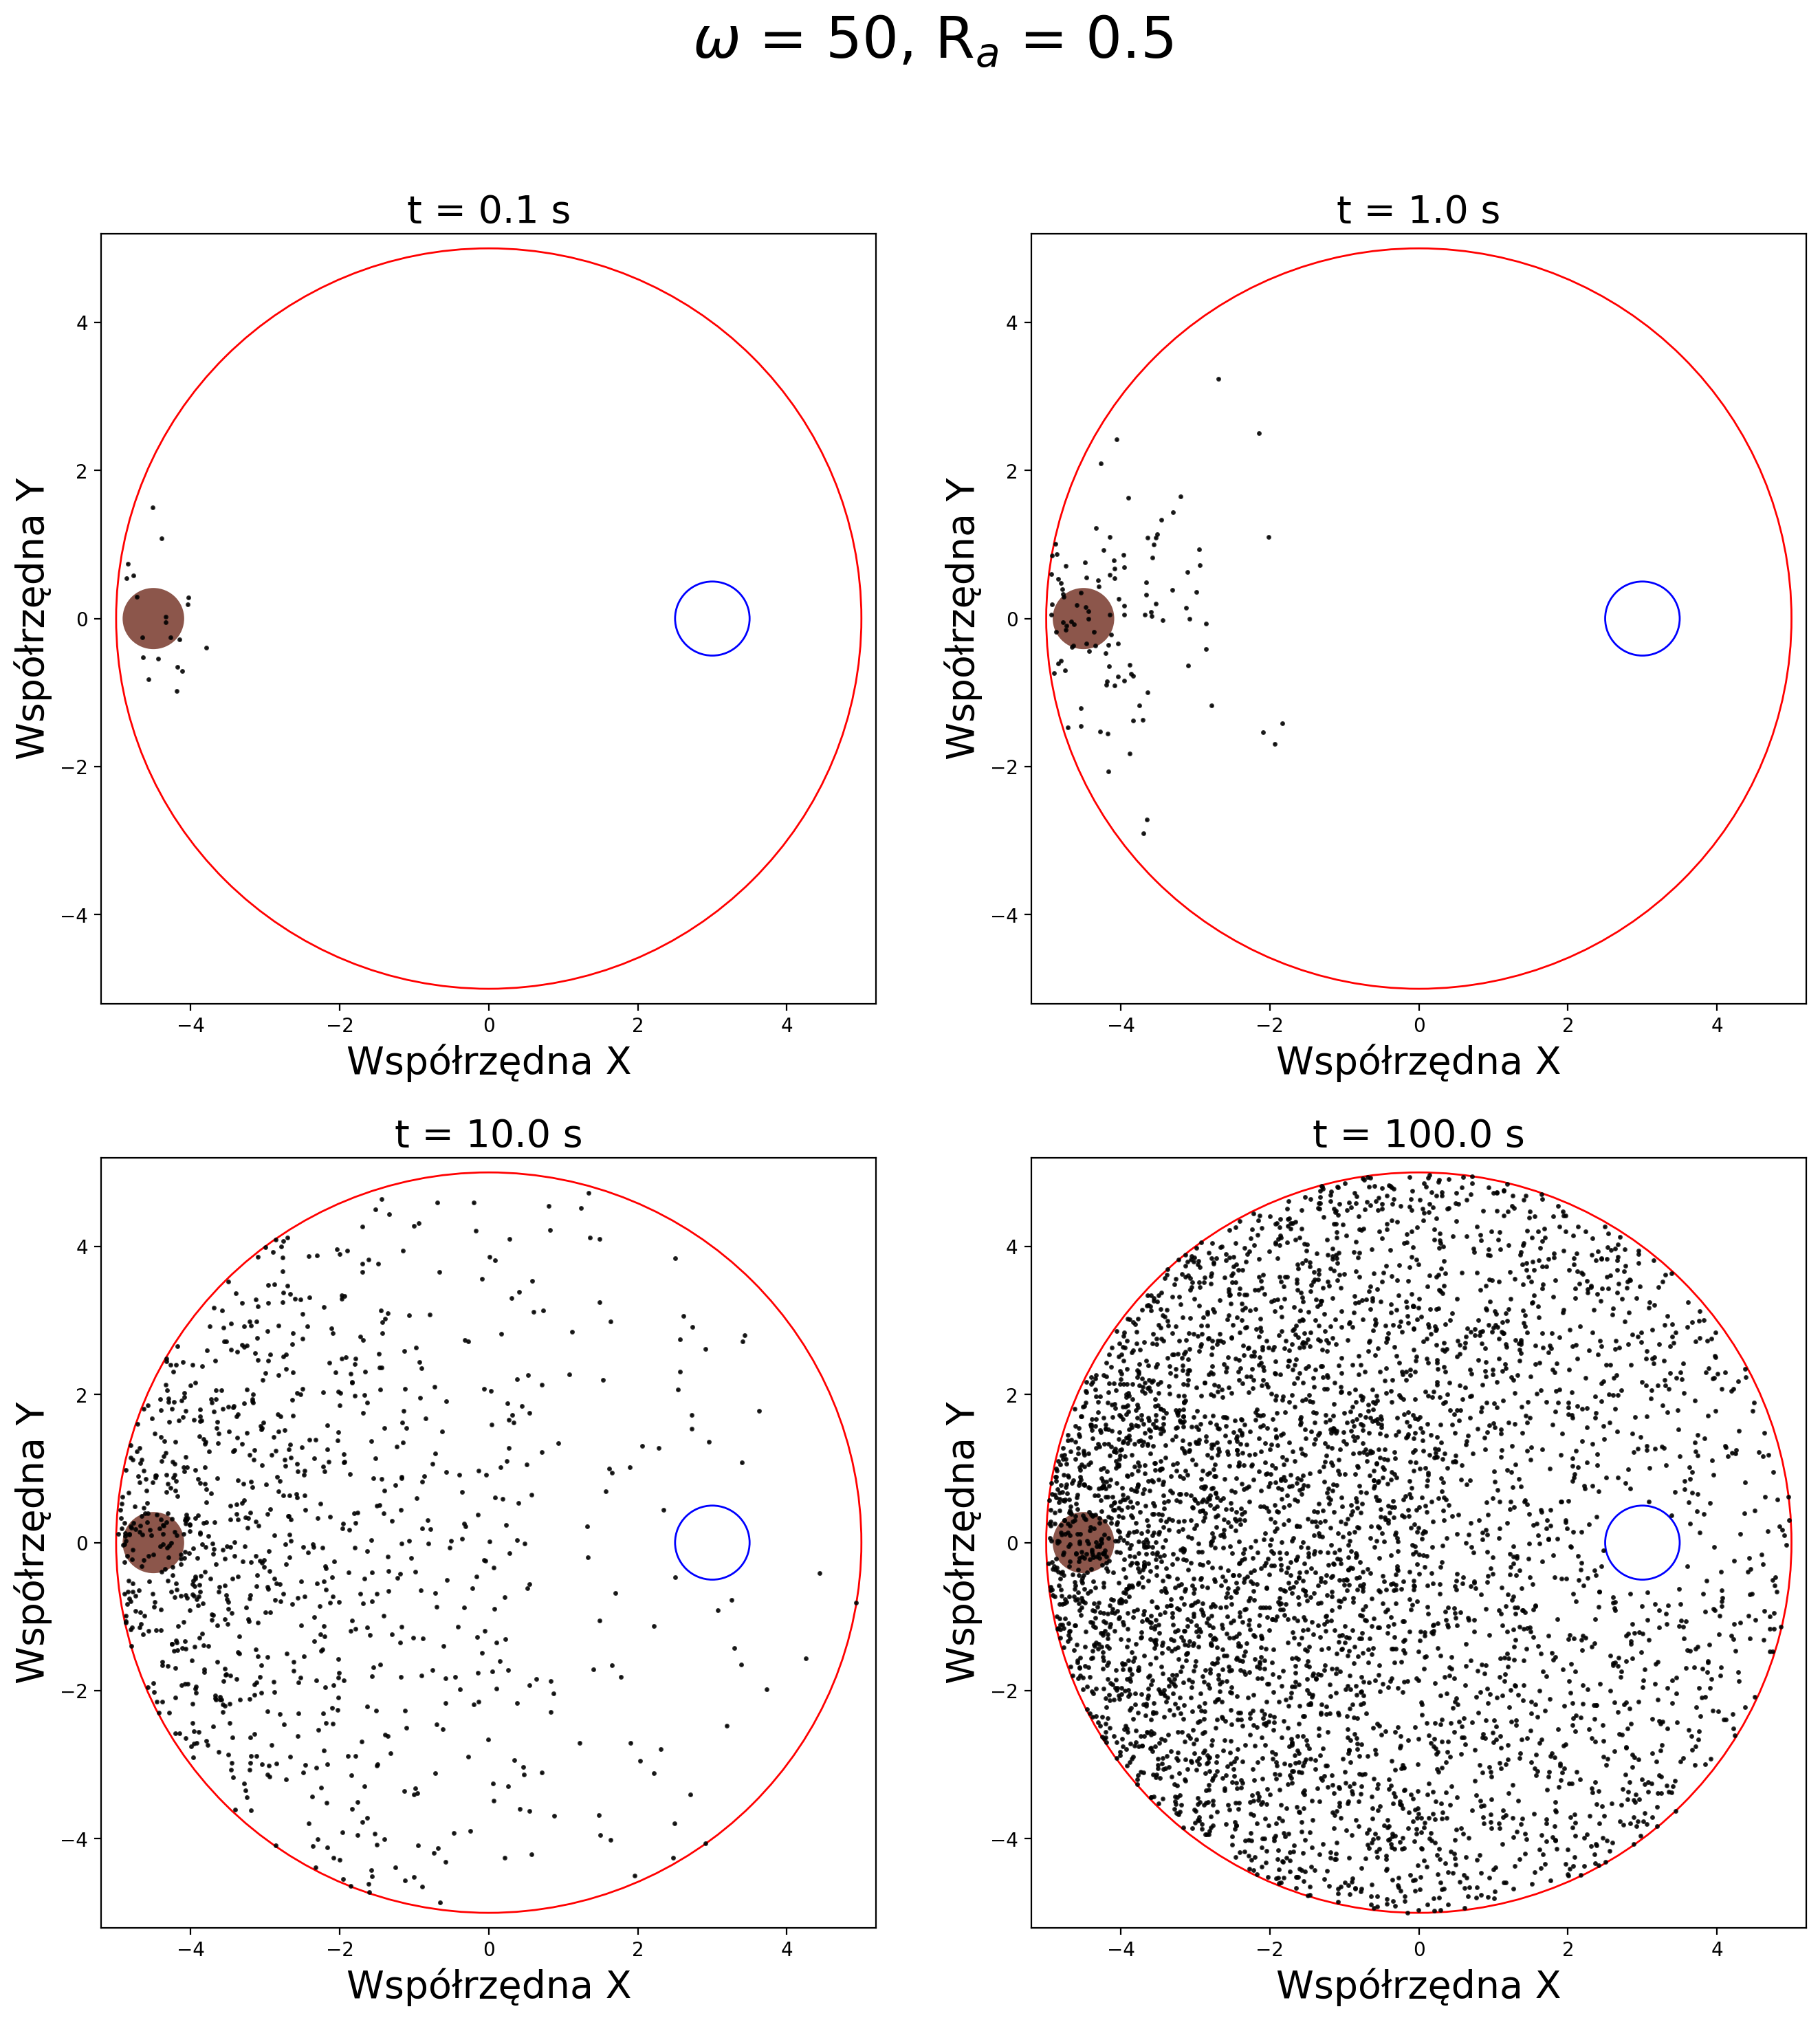

<Figure size 400x400 with 0 Axes>

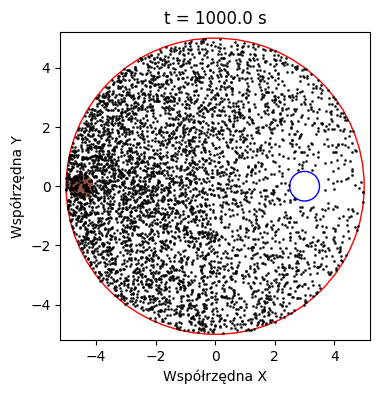

In [12]:
data = np.loadtxt("omega2_Ra_1_pos.dat", comments="#", delimiter=" ", unpack=False)

for i in range(len(data)):
    if data[i][2] == 0:
        data[i][0] = None
        data[i][1] = None

color1 = "#ee4035"
color3 = "#f37736"
color4 = "#7bc043"
color2 = "#0392cf"

color4 = "k"
color1 = color4
color2 = color4
color3 = color4

N = 10001
Nprew = 0

Ra = 0.5

fig, axs = plt.subplots(2, 2, figsize=(16,16), dpi=200)

fig.suptitle(r' $\omega$ = 50, R$_a$ = 0.5 ', fontsize=30)

axs[0,0].plot(data[Nprew + 0:Nprew + N,0], data[Nprew + 0:Nprew + N,1], 'o', markeredgecolor=color4, markerfacecolor=color4, markersize=1.5, alpha=0.8, label="t = 0.1")
circle1 = plt.Circle((0, 0), 5, color='r', fill=False)
axs[0,0].add_patch(circle1)
circle2 = plt.Circle((-4.5, 0), 0.4, color='tab:brown', fill=True)
axs[0,0].add_patch(circle2)
circle3 = plt.Circle((3, 0), Ra, color='b', fill=False)
axs[0,0].add_patch(circle3)
axs[0,0].set_title("t = 0.1 s", fontsize=20)
axs[0,0].set_xlabel("Współrzędna X", fontsize=20)
axs[0,0].set_ylabel("Współrzędna Y", fontsize=20)
axs[0,0].set_xlim([-5.2,5.2])
axs[0,0].set_ylim([-5.2,5.2])


axs[0,1].plot(data[Nprew + N:Nprew + 2*N,0], data[Nprew + N:Nprew + 2*N,1], 'o', markeredgecolor=color3, markerfacecolor=color3, markersize=1.5, alpha=0.8, label="t = 1.0")
circle1 = plt.Circle((0, 0), 5, color='r', fill=False)
axs[0,1].add_patch(circle1)
circle2 = plt.Circle((-4.5, 0), 0.4, color='tab:brown', fill=True)
axs[0,1].add_patch(circle2)
circle3 = plt.Circle((3, 0), Ra, color='b', fill=False)
axs[0,1].add_patch(circle3)
axs[0,1].set_title("t = 1.0 s", fontsize=20)
axs[0,1].set_xlabel("Współrzędna X", fontsize=20)
axs[0,1].set_ylabel("Współrzędna Y", fontsize=20)
axs[0,1].set_xlim([-5.2,5.2])
axs[0,1].set_ylim([-5.2,5.2])


axs[1,0].plot(data[Nprew + 2*N:Nprew + 3*N,0], data[Nprew + 2*N:Nprew + 3*N,1], 'o', markeredgecolor=color2, markerfacecolor=color2, markersize=1.5, alpha=0.8, label="t = 10.0")
circle1 = plt.Circle((0, 0), 5, color='r', fill=False)
axs[1,0].add_patch(circle1)
circle2 = plt.Circle((-4.5, 0), 0.4, color='tab:brown', fill=True)
axs[1,0].add_patch(circle2)
circle3 = plt.Circle((3, 0), Ra, color='b', fill=False)
axs[1,0].add_patch(circle3)
axs[1,0].set_title("t = 10.0 s", fontsize=20)
axs[1,0].set_xlabel("Współrzędna X", fontsize=20)
axs[1,0].set_ylabel("Współrzędna Y", fontsize=20)
axs[1,0].set_xlim([-5.2,5.2])
axs[1,0].set_ylim([-5.2,5.2])


axs[1,1].plot(data[Nprew + 3*N:Nprew + 4*N,0], data[Nprew + 3*N:Nprew + 4*N,1], 'o', markeredgecolor=color1, markerfacecolor=color1, markersize=1.5, alpha=0.8, label="t = 100.0")
circle1 = plt.Circle((0, 0), 5, color='r', fill=False)
axs[1,1].add_patch(circle1)
circle2 = plt.Circle((-4.5, 0), 0.4, color='tab:brown', fill=True)
axs[1,1].add_patch(circle2)
circle3 = plt.Circle((3, 0), Ra, color='b', fill=False)
axs[1,1].add_patch(circle3)
axs[1,1].set_title("t = 100.0 s", fontsize=20)
axs[1,1].set_xlabel("Współrzędna X", fontsize=20)
axs[1,1].set_ylabel("Współrzędna Y", fontsize=20)
axs[1,1].set_xlim([-5.2,5.2])
axs[1,1].set_ylim([-5.2,5.2])

plt.show()

plt.figure(figsize=(4,4), dpi=100)
plt.figure(figsize=(4,4), dpi=100)
plt.plot(data[Nprew + 4*N:Nprew + 5*N,0], data[Nprew + 4*N:Nprew + 5*N,1], 'o', markeredgecolor=color1, markerfacecolor=color1, markersize=1.0, alpha=0.8)
circle1 = plt.Circle((0, 0), 5, color='r', fill=False)
plt.gca().add_patch(circle1)
circle2 = plt.Circle((-4.5, 0), 0.4, color='tab:brown', fill=True)
plt.gca().add_patch(circle2)
circle3 = plt.Circle((3, 0), Ra, color='b', fill=False)
plt.gca().add_patch(circle3)
plt.title("t = 1000.0 s")
plt.xlabel("Współrzędna X")
plt.ylabel("Współrzędna Y")
plt.xlim([-5.2,5.2])
plt.ylim([-5.2,5.2])
plt.show()

[array([   2.,    3.,    4., ..., 1168., 1169., 1170.]), array([  2.,   3.,   4., ..., 517., 517., 518.]), array([  10.,   15.,   20., ..., 5771., 5774., 5772.]), array([  10.,   15.,   20., ..., 2528., 2529., 2531.]), array([  20.,   30.,   40., ..., 9988., 9988., 9991.]), array([  20.,   30.,   40., ..., 4915., 4913., 4917.])]


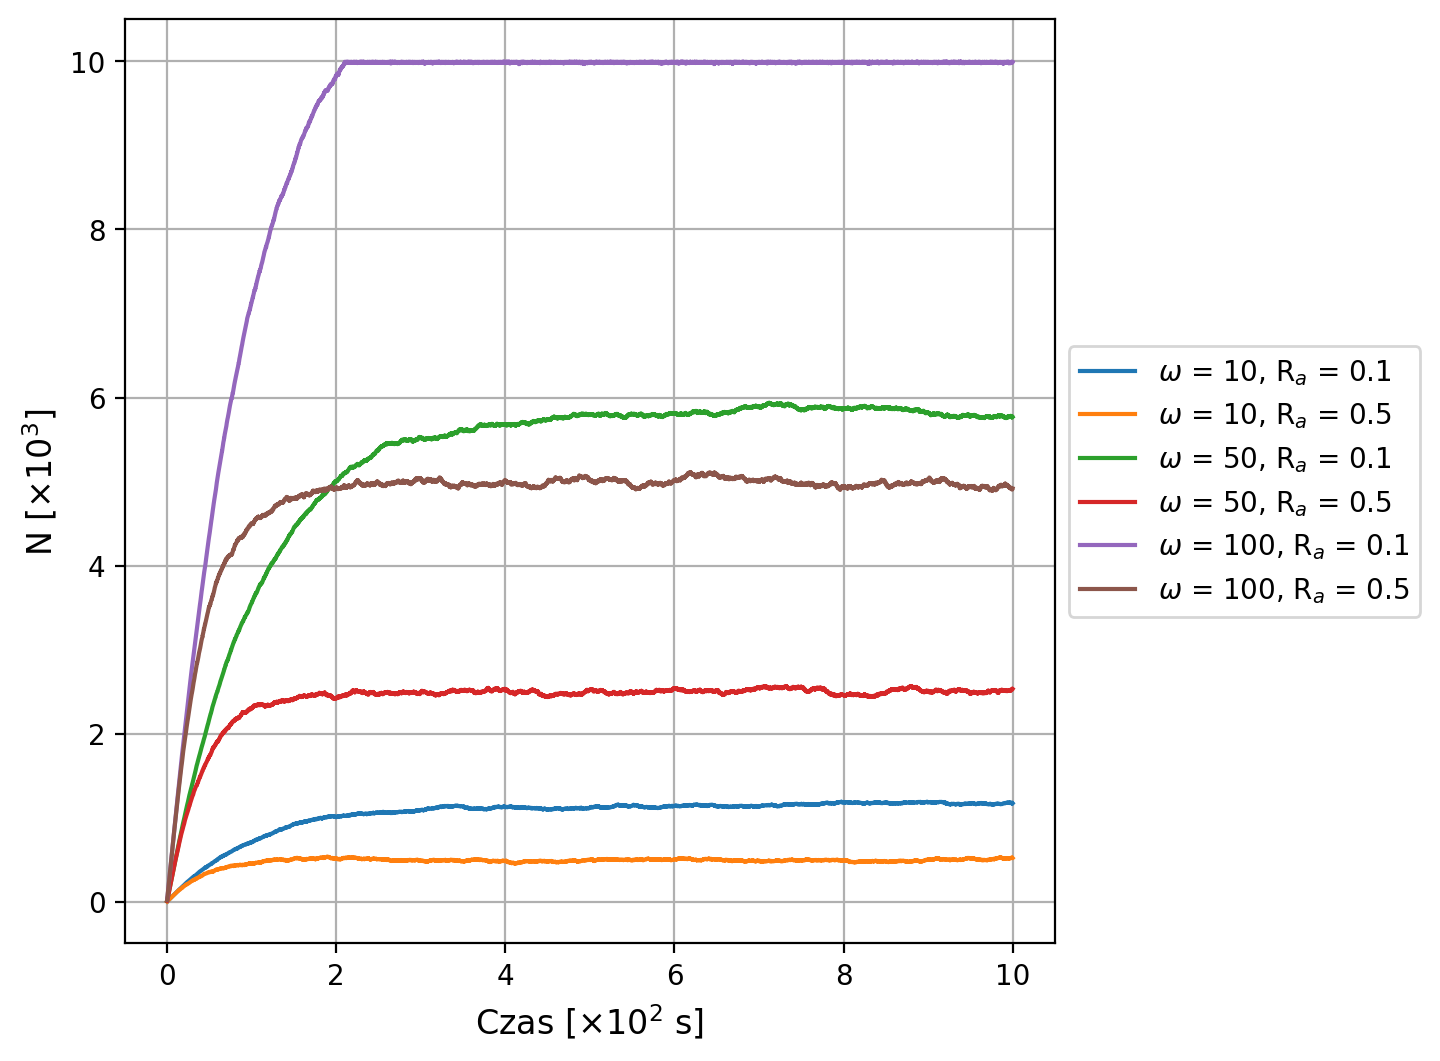

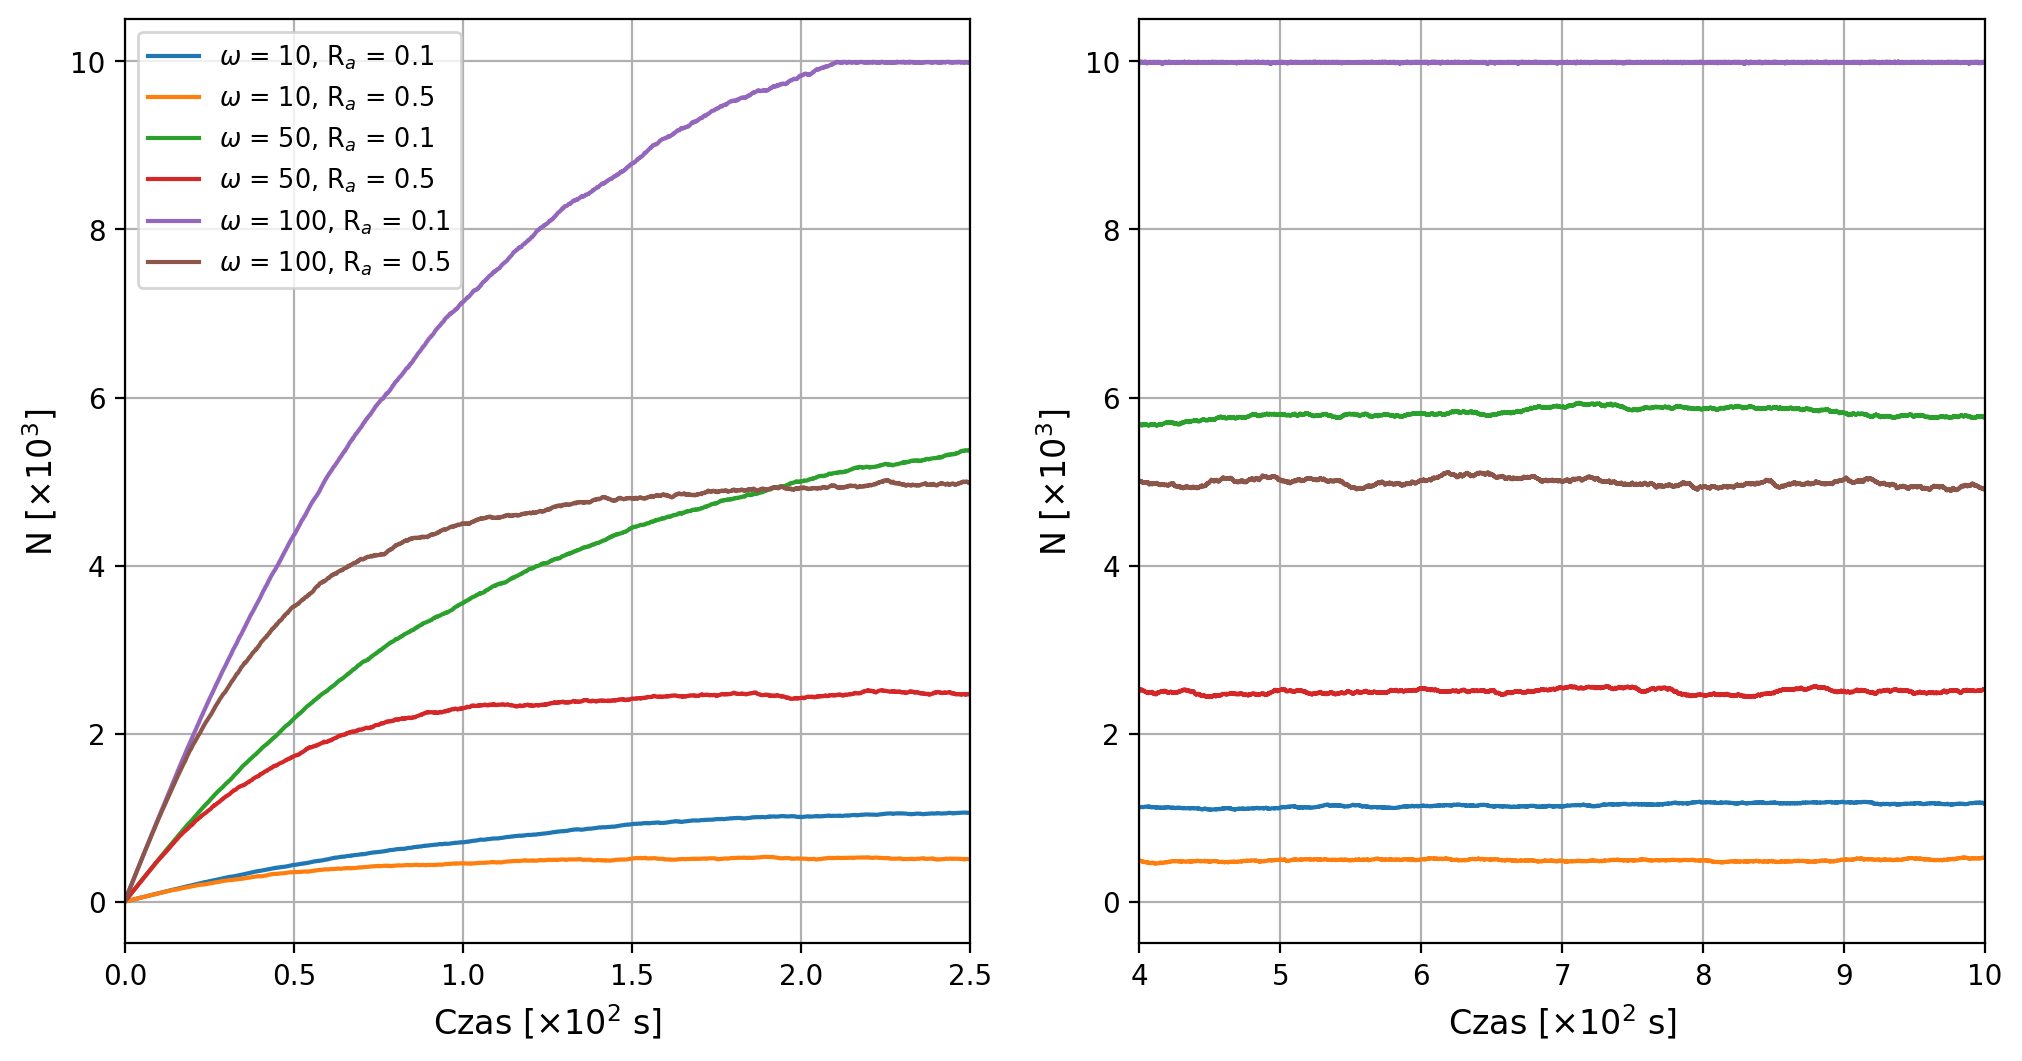

In [62]:
N = 10000

stat1 = np.loadtxt("omega0_Ra_0_stat.dat", comments="#", delimiter=" ", unpack=False, skiprows=1)
x=stat1[0:N,1]/100
stat1 = stat1[0:N,8]

stat2 = np.loadtxt("omega0_Ra_1_stat.dat", comments="#", delimiter=" ", unpack=False, skiprows=1)
stat2 = stat2[0:N,8]

stat3 = np.loadtxt("omega1_Ra_0_stat.dat", comments="#", delimiter=" ", unpack=False, skiprows=1)
stat3 = stat3[0:N,8]

stat4 = np.loadtxt("omega1_Ra_1_stat.dat", comments="#", delimiter=" ", unpack=False, skiprows=1)
stat4 = stat4[0:N,8]

stat5 = np.loadtxt("omega2_Ra_0_stat.dat", comments="#", delimiter=" ", unpack=False, skiprows=1)
stat5 = stat5[0:N,8]

stat6 = np.loadtxt("omega2_Ra_1_stat.dat", comments="#", delimiter=" ", unpack=False, skiprows=1)
stat6 = stat6[0:N,8]

stat = [stat1, stat2, stat3, stat4, stat5, stat6]
labels = [r'$\omega$ = 10, R$_a$ = 0.1', r'$\omega$ = 10, R$_a$ = 0.5', r'$\omega$ = 50, R$_a$ = 0.1', r'$\omega$ = 50, R$_a$ = 0.5',
          r'$\omega$ = 100, R$_a$ = 0.1', r'$\omega$ = 100, R$_a$ = 0.5']

print(stat)

# plt.figure(figsize=(4,4), dpi=200)
# plt.plot(stat[0:N,1], stat[0:N,5], '-', label="D_XX")
# plt.plot(stat[0:N,1], stat[0:N,6], '-', label="D_YY")
# plt.plot(stat[0:N,1], stat[0:N,7], '-', label="D_XY")
# plt.grid(True)
# plt.title(str(N) + " cząsteczek")
# plt.xlabel("Czas [s]")
# plt.ylabel(r'Wartość wspł. dyfuzji [$m^2\cdot s^{-1}$]')
# plt.legend(markerscale=8, fontsize=8, loc='upper right')
# plt.show()

plt.figure(figsize=(6,6), dpi=200)
for i in range(len(stat)):
    plt.plot(x, stat[i]/1000, '-', label=labels[i])
    plt.ylabel(r"N [$\times 10^{3}$]", fontsize=12)
    plt.xlabel(r'Czas [$\times 10^{2}$ s]', fontsize=12)
    plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12,6), dpi=200)

for i in range(len(stat)):
    axs[0].plot(x, stat[i]/1000, '-', label=labels[i])
    axs[0].set_ylabel(r"N [$\times 10^{3}$]", fontsize=12)
    axs[0].set_xlabel(r'Czas [$\times 10^{2}$ s]', fontsize=12)
    axs[0].grid(True)
    axs[0].set_xlim([0,2.5])
    axs[1].plot(x, stat[i]/1000, '-', label=labels[i])
    axs[1].set_ylabel(r"N [$\times 10^{3}$]", fontsize=12)
    axs[1].set_xlabel(r'Czas [$\times 10^{2}$ s]', fontsize=12)
    axs[1].grid(True)
    axs[1].set_xlim([4, 10])
    axs[0].legend(loc='upper left', fontsize=9.2)
plt.show()

(0.0, 200.0)

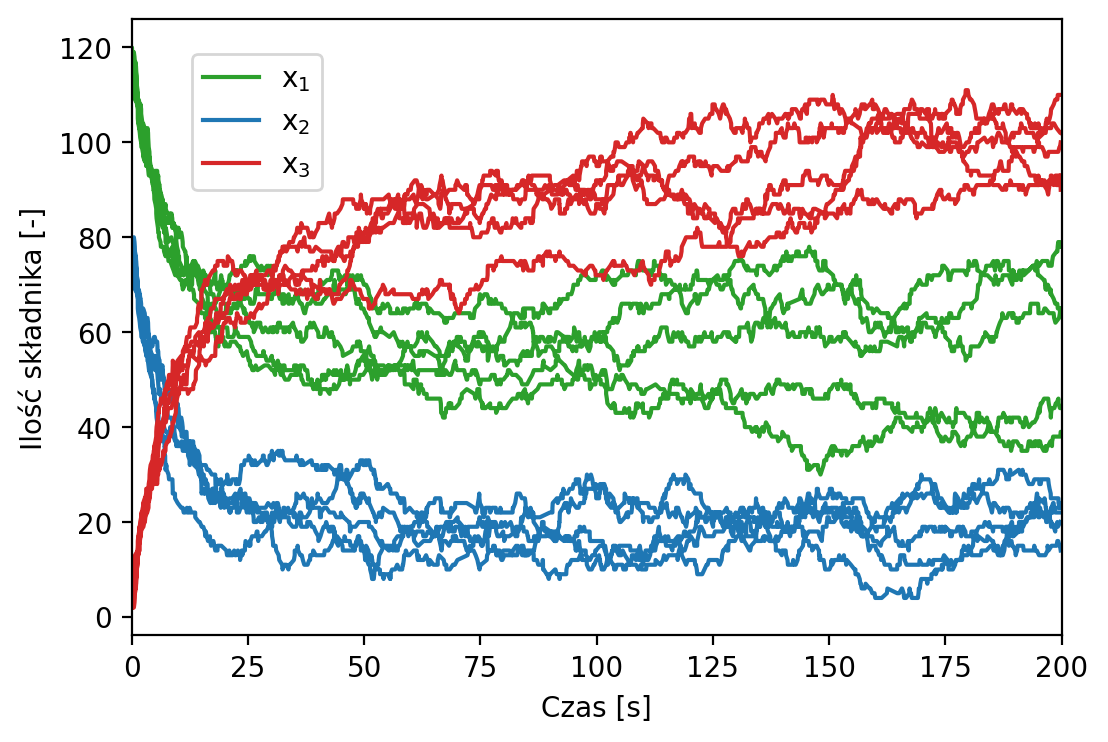

In [53]:
data = np.loadtxt("stat.dat", comments="#", delimiter=" ", unpack=False, skiprows=0)

Pmax = 1
tmax = 200

diffs = np.append(np.diff(data[:,1]), 0)
discont_indices = np.abs(diffs) > np.pi
data[discont_indices,1] = np.nan

diffs = np.append(np.diff(data[:,2]), 0)
discont_indices = np.abs(diffs) > np.pi
data[discont_indices,2] = np.nan

diffs = np.append(np.diff(data[:,3]), 0)
discont_indices = np.abs(diffs) > np.pi
data[discont_indices,3] = np.nan

plt.figure(figsize=(6,4), dpi=200)
for i in range(Pmax):
    plt.plot(data[:,0], data[:,1], color = "tab:green", label="x1")
    plt.plot(data[:,0], data[:,2], color = "tab:blue", label="x2")
    plt.plot(data[:,0], data[:,3], color = "tab:red", label="x3")
plt.legend([r"x$_1$", r"x$_2$", r"x$_3$"], bbox_to_anchor=(0.05,0.70))
plt.xlabel("Czas [s]")
plt.ylabel("Ilość składnika [-]")
plt.xlim([0, 200])

(0.0, 200.0)

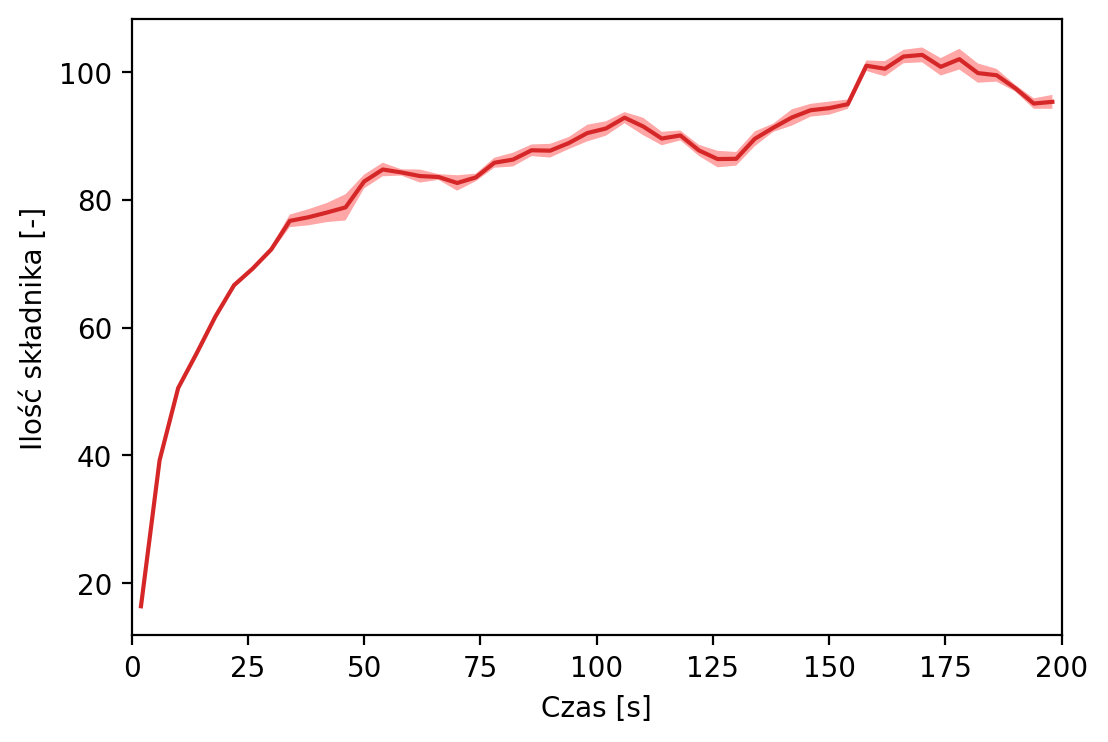

In [52]:
data = np.loadtxt("hist.dat", comments="#", delimiter=" ", unpack=False, skiprows=0)

plt.figure(figsize=(6,4), dpi=200)
plt.plot(data[:,0], data[:,1], color='tab:red')
plt.fill_between(data[:,0], data[:,1]-data[:,2], data[:,1]+data[:,2], alpha=0.35, facecolor='red')
plt.xlabel("Czas [s]")
plt.ylabel("Ilość składnika [-]")
plt.xlim([0, 200])